In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('/content/drive/MyDrive/New twitter/Twitter/twitter_training.csv')

In [5]:
df.head(5)

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
# Drop missing values
df = df.dropna()

In [8]:
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


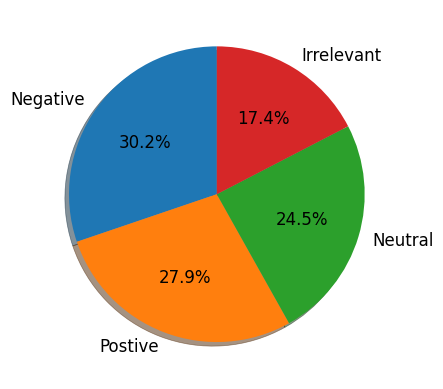

In [11]:
plt.pie(df['Sentiment'].value_counts(), labels=['Negative', 'Postive','Neutral','Irrelevant'], autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12}
           ,shadow=True)
plt.show()

In [12]:
df['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [13]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Join words back into a string
    preprocessed_text = ' '.join(stemmed_words)

    return preprocessed_text

In [14]:
def preprocess_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        filtered_words = [word for word in words if word not in stop_words]

        # Stemming
        stemmer = PorterStemmer()
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        # Join words back into a string
        preprocessed_text = ' '.join(stemmed_words)

        return preprocessed_text
    else:
        # Handle non-string values (e.g., return an empty string or None)
        return ''

In [15]:
df['preprocessed_text'] = df['Tweet Content'].apply(preprocess_text)

In [16]:
df.head(5)

,Tweet ID,Entity,Sentiment,Tweet Content,preprocessed_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"im get borderland murder ,"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"come border kill ,"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"im get borderland kill ,"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"im come borderland murder ,"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"im get borderland 2 murder ,"


In [17]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [18]:
df['sentiment'] = df['preprocessed_text'].apply(get_sentiment)

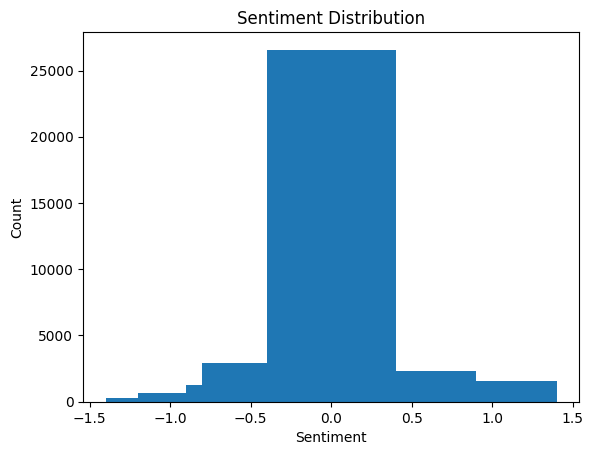

In [19]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = df['sentiment'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [20]:
df.head(10)

,Tweet ID,Entity,Sentiment,Tweet Content,preprocessed_text,sentiment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"im get borderland murder ,",0.000
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"come border kill ,",0.000
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"im get borderland kill ,",0.000
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"im come borderland murder ,",0.000
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"im get borderland 2 murder ,",0.000
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"im get borderland murder ,",0.000
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hour make someth fun . . . n't know huge...,0.320
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,spent coupl hour someth fun ... n't know 'm hu...,0.295
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,spent hour someth fun ... n't know 'm huge @ b...,0.200
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hour make someth fun . . . n't know huge...,0.320


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [22]:
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(df['preprocessed_text'])

sequences = tokenizer.texts_to_sequences(df['preprocessed_text'])
max_length = max(len(seq) for seq in sequences)

padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [23]:
model = Sequential()
model.add(Embedding(10000, 128))  # Adjust embedding dimensions
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
X = padded_sequences
y = df['sentiment']

# Train the model with the correct input (X) and output (y)
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 307s 133ms/step - accuracy: 0.3713 - loss: -3.1998
Epoch 2/5
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 317s 130ms/step - accuracy: 0.3751 - loss: -15.1473
Epoch 3/5
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 329s 134ms/step - accuracy: 0.3780 - loss: -26.2225
Epoch 4/5
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 311s 129ms/step - accuracy: 0.3777 - loss: -38.2288
Epoch 5/5
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 330s 133ms/step - accuracy: 0.3811 - loss: -48.1528


In [27]:
predictions = model.predict(padded_sequences)

2313/2313 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step


In [28]:
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score

# If you need discrete predictions for other metrics:
threshold = 0.5  # Example threshold
binary_predictions = (predictions > threshold).astype(int)
y = (y > threshold).astype(int)
# Now you can use accuracy_score with the binary predictions:
accuracy = accuracy_score(y, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9355640845451105


**Naive Bayes Model**

In [33]:
from sklearn.preprocessing import LabelEncoder
le_model = LabelEncoder()
df['Sentiment'] = le_model.fit_transform(df['Sentiment'])

In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df['preprocessed_text'],df['Sentiment'],
                                                      test_size=0.2 ,random_state=42 , stratify=df['Sentiment'])

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

clf=Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))
])
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [39]:
y_pred = clf.predict(x_test)
#score
print(accuracy_score(y_test,y_pred))

0.7236486486486486
